**მონაცემთა ანალიზი პითონის გამოყენებით**
<br>
Date: **2021 წლის 11 ივნისი**
<br>

სათაური: **ლექცია №8: Seaborn: მონაცემთა ვიზუალიზაციის ბიბლიოთეკა**
<br>
მომხსენებელი: **შოთა ცისკარიძე**

<h1 align="center">Seaborn: მონაცემთა ვიზუალიზაციის ბიბლიოთეკა</h1>

<img src="images/L4_Seaborn.png" width="1000" height="1000" alt="Example"  align="center"/>

<h2 align="center">რა არის Seaborn?</h2>

 - [`Seaborn`](https://seaborn.pydata.org/) არის `Python`-ის მონაცემთა ვიზუალიზაციის ბიბლიოთეკა, რომელიც დაფუძნებულია `matplotlib`– ზე და უზრუნველყოფს მაღალი დონის ინტერფეისს მიმზიდველი და ინფორმატიული სტატისტიკური გრაფიკის შესაქმნელად.
 

- `Seaborn-ის ავტორია [Michael Waskom](https://www.cns.nyu.edu/~mwaskom/), სტენფორდის კურსდამთავრებული [ნიუ იორკის ნევროლოგიური კვლევის ცენტრის](https://www.cns.nyu.edu/home.php) თანამშრომელი.


- ბიბლიოთეკა ატარებს [The West Wing](https://en.wikipedia.org/wiki/The_West_Wing) სერიალის გმირის **სამუელ ნორმან სეიბორნის** სახელს (https://en.wikipedia.org/wiki/Sam_Seaborn). ჟურნალ "Times"-ის თანახმად ეს სერიალი წარმოადგენს "ისტორიაში ერთ-ერთი ყველაზე მნიშვნელოვან სერიალს".


- ორი ძირითადი მიზეზი რატომ უნდა გამოვიყენოთ `Seaborn`-ი:
  1. მაღალი დონის ინტერფეისი: მარტივი გრაფიკების უმრავლესობის აგება ხდება ერთ კოდის ერთ სტრიქონში.
  2. ესთეტიკური სილამაზე: ხშირად `Seaborn`-ის სტილები საკმარისად კარგი ხარისხისაა ზედმეტი ჩარევის გარეშე.


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

- განვიხილოთ რამდენიმე `matplotlib`-ით აგებული სინუსის ტრაექტორიები და გავაუმჯობესოთ ისინი `seaborn`-ის გამოყენებით:

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

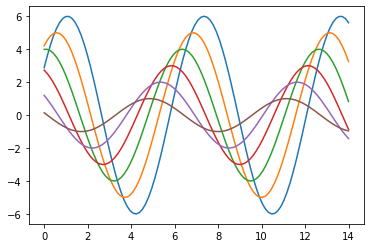

In [3]:
sinplot()

<h3 align="center">1. სტილი</h3>


- `Seaborn`-ი იძლევა გრაფიკების ესთეტიკური პარამეტრების დაყენების საშუალებას.


- `sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)`
  - `context` - კონტექსტის პარამეტრები. გავლენას ახდენს ეტიკეტების, ხაზების და სხვა ელემენტების ზომაზე, მაგრამ არა მთლიან სტილზე. კონტექსტი: `notebook`, `paper`, `talk`, `poster`;
  - `style` - ღერძების სტილი: `darkgrid` (ნაცრისფერი ფონი ბადეთი), `whitegrid` (ნაცრისფერი ფონი ბადეთი), `dark` (ნაცრისფერი ფონი ბადეთის გარეშე), `white`  (ნაცრისფერი ფონი ბადეთის გარეშე), `ticks`;
  - `palette` - ფერების პალიტრა: `deep`, `muted`, `bright`, `pastel`, `dark`, `colorblind`, ასევე პალიტრები `matplotlib`-დან;
  - `font` - ტექსტის ფონტი;
  - `font_scale` - ტექსტის ზომა.

- ჩვენ შეგვიძლია გრაფიკის `context`-ის შეცვლა:

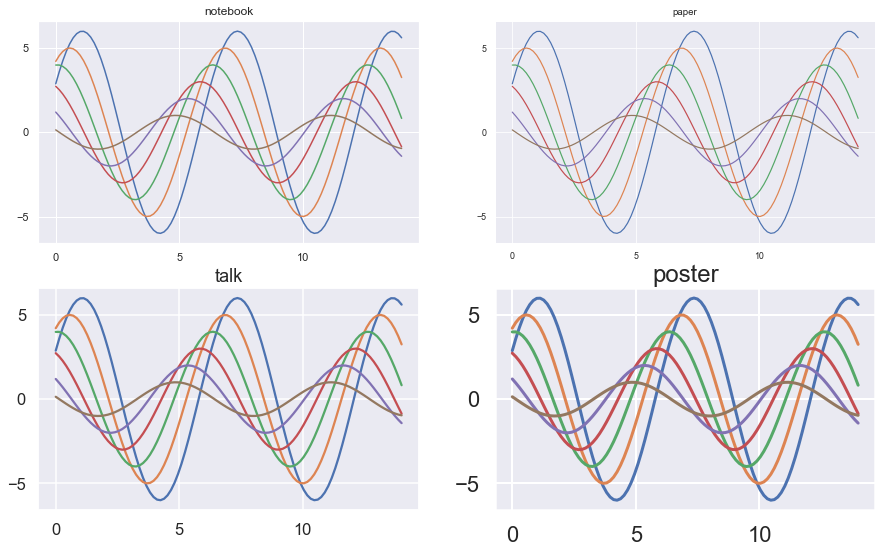

In [4]:
plt.figure(figsize=(15, 9))
for i, context in enumerate(['notebook', 'paper', 'talk', 'poster']):
    sns.set(context=context)
    plt.subplot(2, 2, i+1)
    sinplot()
    plt.title(context)

- ასევე ჩვენ შეგვიძლია გრაფიკები სტილის შეცვლა:

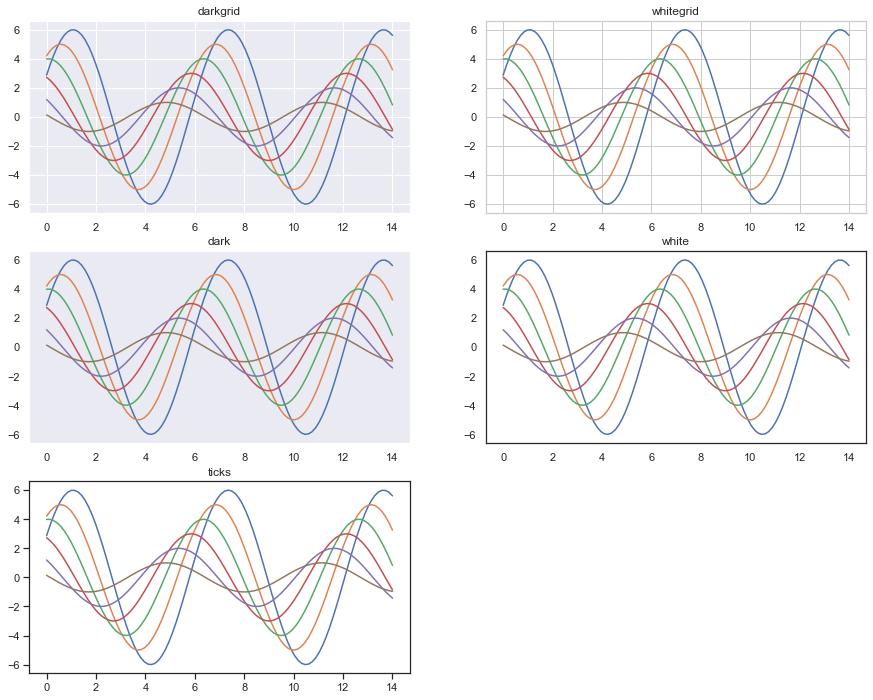

In [5]:
plt.figure(figsize=(15, 12))
for i, style in enumerate(['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']):
    sns.set(style=style)
    plt.subplot(3, 2, i+1)
    sinplot()
    plt.title(style)

- `Seaborn`-ში თქვენ შეგიძლიათ მოაშოროთ გრაფიკის ჩარჩო ნებისმიერ მხრიდან. `matplotlib`-ში იგივეს გაკეთება [არატრივიალურია](https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame).


- `sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)`
 - `fig` - წარმოადგენს `matplotlib`-ის ფიგურას.
 - `top`, `right`, `left`, `bottom` - უთითებს ჩარჩოს გვერდებს. ზოგადად, მარცხენას და ქვედა ხაზებს ტოვებენ.

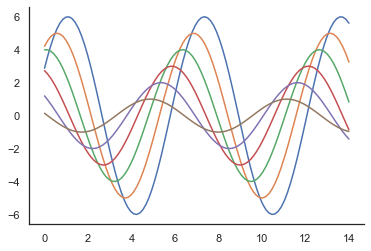

In [6]:
sns.set(style='white')
sinplot()
sns.despine()

- ზემოთ მოყვანილი მაგალითის დიდი ნაკლია `sns.set`-ის გამოყენება.  

  საქმე იმაშია, რომ ეს ფუნქცია ცვლის გლობალურ პარამეტრებს: ყველა შემდგომი გრაფიკი შედგენილი იქნება იგივე სტილში.


- ზოგჯერ ეს მოსახერხებელია: შეგიძლიათ დასაწყისში ერთხელ გამოიძახოთ `sns.set`-ი და მიიღოთ სტილიზებული გრაფიკები მინიმალური ძალისხმევით. 
  
  
- ყველა სხვა შემთხვევაში, თქვენ უნდა `sns.set`-ის ნაცვლად გამოიყენოთ კონტექსტის მენეჯერები `sns.plotting_context` და `sns.axes_style`.

In [7]:
sns.set()

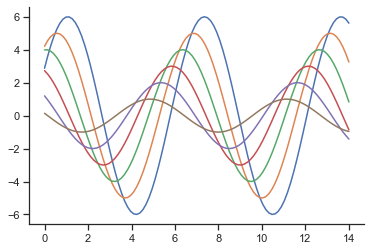

In [8]:
with sns.plotting_context("notebook"), sns.axes_style("ticks"):
    sinplot()
    sns.despine()

<h3 align="center">ფერების პალიტრები</h3>

- გამოყენებული პალიტრის ვიზუალიზაცია შეიძლება `sns.palplot` ფუნქციის გამოყენებით.


- პალიტრები იყოფა რამდენიმე ტიპად:

<h3 align="center">თანმიმდევრობითი პალიტები (sequential)</h3>

- სტანდარტული თანმიმდევრობითი პალიტრები:
  - გამოირჩევიან ინტენსივობის გლუვი გადასვლით;
  - არ ამახინჯებენ ფერების აღქმას და ასევე შესაფერისია ფერის უსინათლოებისთვის;
  - ყველაზე ხშირად ხვდება მომხმარებელს.


- `seaborn`-ის  სტანდარტული თანმიმდევრობითი პალიტრებია: `viridis`, `inferno`, `magma` და სხვები. 

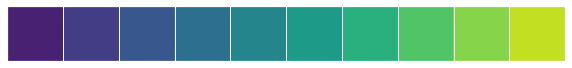

In [9]:
sns.palplot(sns.color_palette('viridis', n_colors=10))

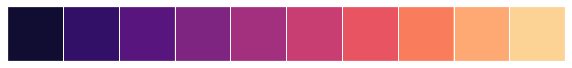

In [10]:
sns.palplot(sns.color_palette('magma', n_colors=10))

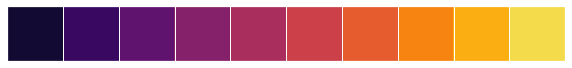

In [11]:
sns.palplot(sns.color_palette('inferno', n_colors=10))

<h3 align="center">დივერსიული პალიტრები (diverging)</h3>

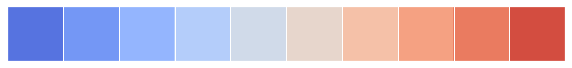

In [13]:
sns.palplot(sns.color_palette('coolwarm', n_colors=10))

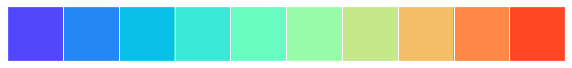

In [14]:
sns.palplot(sns.color_palette('rainbow', n_colors=10))

- წარსულში, დიდი პოპულარობით გამოირჩეოდა `jet`-ის პალიტრა, რომელიც ძალიან ჰგავდა ცისარტყელას. 


- დიდი ხნის განმავლობაში `jet`-ის პალიტრა იყო ნაგულისხმევი პალიტრა `matplotlib`-ში. 


- მიუხედავად ამისა, `jet`-ი მიატოვეს: აღმოჩნდა, რომ ეს ამახინჯებს სურათის აღქმას პალიტრის ინდივიდუალური ფერების არათანაბარი ინტენსივობის გამო. 


- არსებობს  [საინტერესო სტატია](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/), რომელშიც დეტალურად განმარტავს ამ გადაწყვეტილების მიზეზებს.


- სახალისო ფაქტი: თუ თქვენ დააპირებთ `jet`-ი პალიტრის გამოყენებას, `seaborn`-ი თქვენ გიპასუხებთ "არა"-ს.

In [15]:
sns.palplot(sns.color_palette('jet', n_colors=10))

ValueError: No.

<h3 align="center">თვისობრივი პალიტრები (qualitative)</h3>

In [ ]:
sns.palplot(sns.color_palette('muted', n_colors=10))

In [ ]:
sns.palplot(sns.color_palette('Set2', n_colors=10))

<h3 align="center">საკუთარი პალიტრები</h3>

- `seaborn`-ში შეგიძლიათ გააკეთოთ თქვენი საკუთარი პალიტრა: ან არსებულიდან გამომდინარე, ან მთლიანად ნულიდან.

- მოდით მაგალითისთვის გავაკეთოთ პალიტრაში სტაფილოსფერის ათი ტონალური ფერისთვის

In [ ]:
sns.palplot(sns.dark_palette("xkcd:blood orange", n_colors=10))

- თქვენ მიაქცევდით ყურადღებას, რომ გამოყენებულ იქნა უცნაური ტიპის ფორმატი: `xkcd:blood orange`.


- 2010 წელს პოპულარულმა ონლაინ კომიქსმა [xkcd](https://xkcd.com/)-მა ჩაატარა გამოკითხვა, რომლის თანახმად, მან შეარჩია სახელები 954 ყველაზე გამოყენებად `RGB` ფერებისთვის, რამაც გაუმარტივა ცხოვრება მომხმარებელთა უზარმაზარ რაოდენობას, დიზაინერებიდან დაწყებული ანალიტიკოსებით და მეცნიერებით დამთავრებული.

- მოდით მაგალითისთვის დავხართოთ ცისარტყელა

In [ ]:
count = 100
colors = sns.color_palette('rainbow', count)
layers = np.linspace(1, 2, count)

plt.figure(figsize=(8, 4))
for i in np.arange(count):
    grid = np.linspace(-layers[i], layers[i], 100)
    y = np.sqrt(layers[i]**2 - grid**2)
    sns.lineplot(grid, y, c=colors[i])

In [ ]:
plt.figure(figsize=(8, 4))
for i in np.arange(count):
    grid = np.linspace(-layers[i], layers[i], 100)
    y = np.sqrt(layers[i]**2 - grid**2)
    sns.lineplot(grid, y, c=colors[i])
plt.xticks([]);
plt.yticks([]);
sns.despine(left=True, bottom=True);

- უფრო მეტი პალეტების შესახებ იხილეთ [ოფიციალური დოკუმენტაციაში](https://seaborn.pydata.org/tutorial/color_palettes.html)..

<h3 align="center">2. სიმკვრივის შეფასება</h3>

- დავუშვათ გვაქვს $X = (X_1, ..., X_n)$ უწყვეტი განაწილების ნიმუში.


- ავირჩიოთ $q(x)$ - რაღაც ბაზური სიმკვრივე და დავარქვათ მას "ბირთვი".

 - ხშირად, ბირთვის ქვეშ იგულისხმება ნორმალური განაწილების სიმკვრივე $\mathcal{N}(0, I_n)$. 
 
 - $h > 0$ - არის სიდიდე რომელიც პასუხისმგებელია ბირთვის მასშტაბზე და მას ეწოდება **ბირთვის სიგანე**.


- $X$ ნიმუშის ბირთვული სიმკვრივის შეფასება (Kernel Density Estimation, KDE) ეწოდება სიდიდეს ([ვიზუალიზაცია იხლიეთ აქ](https://mathisonian.github.io/kde/)):
 
  $$\widehat{p}_h(x) = \frac{1}{nh}\sum_{i=1}^n q\left(\frac{x-X_i}{h}\right)$$
  




- ბირთვული სიმკვრივის შეფასება (kernel density estimation, KDE) გამოიყენება იმ შემთხვევაში თუ არაფერი არ არის ცნობილი განაწილებაზე შესახებ. 


- ასეთ მეთოდებს ხშირად უწოდებენ **არაპარმეტრული** მეთოდებს


- ეს მეთოდები აჩვენებენ სტატისტიკის და ალბათობის თეორიაში მიდგომების განსხვავებას: 
  - ალბათობის თეორიაში ცნობილია განაწილება და შესასწავლია მისი თვისებები;
  - სტატისტიკის თეორიაში ხშირად ცნობილია მხოლოდ მონაცემები, რის მიხედვითაც საჭიროა განაწილების გამოცნობა.

<img src="images/L4_KDE.png" width="800" alt="Example"  align="center"/>

<h3 align="center">1D და 2D KDE-ს შექმნა და დახატვა: sns.kdeplot</h3>

- `sns.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)`
    - `data` - ნუმუში;
    - `data2` - მეორე კოორდიანატა ორგანზომილებიან შემთხვევაში;
    - `shade` - არეების გაფერადება. 1D შემთხვევაში გააფერადებს არეებს გრაფიკის ქვეშ, ხოლო 2D შენთხვევაშუ გააფერადებს არეებს დონის ხაზებს შორის;
    - `vertical` - გრაფიკის შემოტრიალებია;
    - `kernel` - ბირთვის ეტიკეტი. 
      - 1D შენთხვევაშუ მისაწვდომელია `gau`, `cos`, `biw`, `epa`, `tri`, `triw`;
      - 2D შემთხვევაში მხოლოდ `gau`;
    - `bw`  ბირთვის სიგანე. შეგიძლიათ მიუთითოთ `scott`, `silverman` ან რიცხვი. ორ განზომილებინ შემთხვევაში შეგიძლიათ მიუთითოთ წყვილი რიცხვი.
    - `gridsize` - ბადის ზომა. ის გავლენას ახდენს მხოლოდ ნახაზის სიზუსტეზე და არა სიმკვრივის შეფასების სიზუსტეზე;
    - `cut` - ადგენს KDE ნახაზის საზღვრებს.
    - `clip`- ადგენს ნახაზის ქვედა და ზედა საზღვრებს რის მიხედვითაც იგება KDE. პარამეტრებია: `(low, high)` ერთ განზომილებიან შემთხვევაში და `((low_x, high_x), (low_y, high_y))` ორ განზომილებიან შემთხევაში;
    - `legend` - ნახაზის ლეგენდა;
    - `cumulative` - თუ არის `True`, მაშინ ხატავს განაწილების ფუნქციას, რომელიც შეესაბამება KDE-ს;
    - `shade_lowest` - ადგენს საჭიროა თუ არა შეივსოს ბოლო კონტური ორგანზომილებიან შემთხვევაში. შეიძლება იყოს სასარგებლო როდესაც რამოდენიმე KDE არის დასახატი ნახაზზე.
    - `cbar` - ამატებს დერების პალიტრას colorbar 2D შემთხვევაში;
    - `cbar_kws` - არგუმენტები, რომლებიც შეესაბამება `fig.colorbar`;
    - `kwargs` - სხვა არგუმენტები, რომლებიც შეესაბამება `plt.plot` ან `plt.contour`. მაგალითად `color` - არის ფერი, `cmap` - არის ფერითი სქემა, `n_levels` - არის - დონეზე ხაზების რაოდენობა.

<h3 align="center">1D და 2D KDE-ს შექმნა და დახატვა: sns.distplot</h3>

- `sns.distplot` - წარმოადგენს ნიმუშის ერთგანზომილებიანი განაწილების გრაფიკს.


- აერთიანებს თვისებებს `plt.hist`, `sns.kdeplot`, `sns.rugplot` და ფუნქციას `fit` რომელიც ეკუთვნის `scipy.stats` ბიბლიოთეკას.


- `sns.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)`
  - `a` - ნიმუში;
  - `bins` - ბინ-ების რაოდენბოა ჰისტოგრამაში. თუ მითითებულია `None`, მაშინ ბინ-ების რაოდენობა დგინდება Freedman-Diaconis წესით;
  - `hist` - დაიხატოს თუ არა ჰისტოგრამა;
  - `kde` - დაიხატოს თუ არა KDE;
  - `rug` - დავხატოთ თუ არა ნიმუშების წერტილები შტრიხების სახით;
  - `hist_kws`, `kde_kws`, `rug_kws` - ჰისტოგრამის პარამეტრები, KDE და rugplot ლექსიკონების სახით;
  - `fit` - განაწილების ოჯახი. ობიექტს უნდა ქონდეს `fit` მეთოდი, რომელიც დააბრუნებს მაქსიმალური ალბათობის შეფასებას (`Maximum likelihood estimation`, `MLE`) `tuple`-ის სახით, და მეთოდი `pdf`, რომელიც ბადეზე დაითვლის განაწილების სიმკვრივეს პარამეტრებით, რომლებიც შეესაბამება `MLE`;
  - `color` - ფერი;
  - `vertical` - გრაფიკის შემოტრიალება;
  - `norm_hist` - ჰისტოგრამის ნორმირება.

- განვიხილოთ მაგალითი სადაც ნაჩვენებია `distplot` გრაფიკის ოთხივე ტიპისთვის სადაც ნიმუში არის ნორმალურად განაწილებული. 
  - განაწილების პარამეტრული ოჯახისთვის გამოიყენება ყველა ნორმალური განაწილებები. 
  - განაწილების სიმკვრივე, რომელიც შეესაბამება MLE, დახატულია შავი ფერით

In [ ]:
x = sps.norm.rvs(size=100)
with sns.plotting_context(font_scale=1.5), sns.axes_style('whitegrid'):
    plt.figure(figsize=(12, 7))
    plt.title(r"Kernel Density Estimation $\mathcal{N}(0, 1)$")
    sns.distplot(x, rug=True, fit=sps.norm, color='red');

- მაგალითი მრავალგანზომილებიანი სიმკვრივის შეფასების

In [ ]:
x, y = sps.multivariate_normal(cov=[[2, 1], [1, 2]]).rvs(size=1000).T
plt.figure(figsize=(12, 7))
plt.title(r"Kernel Density Estimation $\mathcal{N}(\mathbf{0}, \mathbf{\Sigma})$")
sns.kdeplot(x, y, n_levels=15, shade=True, cmap="magma");

<h3 align="center">ირისის ყვავილების მონაცემთა ნაკრები</h3>

- [**ირისის ყვავილების მონაცემების ნაკრები**](https://en.wikipedia.org/wiki/Iris_flower_data_set) (ან **ფიშერის ირისის მონაცემების ნაკრები**) წარმოადგენს მრავალრიცხოვან მონაცემებს, რომლებიც ბრიტანელმა სტატისტიკოსმა, ევგენიკოსმა და ბიოლოგმა რონალდ ფიშერმა შეაგროვა 1936 წელს.


- მონაცემთა ნაკრები **50 ნიმუშისგან შედგება** ირისის სამივე სახეობიდან (Iris setosa, Iris virginica და Iris versicolor).


- ყვავილის თითოეულ სახებოას **ოთხი მაჩვენებელი** ახასიათებს: **სეპლების და ფურცლების სიგრძე და სიგანე** (სანტიმეტრში). 


- ამ ოთხი თვისების კომბინაციიდან გამომდინარე, ფიშერმა შეიმუშავა დისკრიმინაციული მოდელი რომელიც განასხვავებდა ირისის სამ სახეობას ერთმანეთისგან.


- `seaborn`-ს გააჩნია პირდაპირი წვდომა ფიშერის მონაცემებზე, რომელიც ხშირად გამოიყენება როგორც სავარჯიშო მონაცემები.

<img src="images/L4_Iris.png" width="1000" alt="Example"  align="center"/>

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

In [ ]:
 iris.shape

In [16]:
setosa = iris.loc[iris.species == 'setosa']
virginica = iris.loc[iris.species == 'virginica']
versicolor = iris.loc[iris.species == "versicolor"]

NameError: name 'iris' is not defined

- ავაგოთ ამ მონაცემებისთვის KDE გრაფიკები

In [17]:
plt.figure(figsize=(12, 8))
with sns.axes_style("darkgrid"):
    ax = sns.kdeplot(setosa.sepal_length, setosa.sepal_width, 
                     label="setosa", cmap='Blues')
    ax = sns.kdeplot(versicolor.sepal_length, versicolor.sepal_width, 
                     label="versicolor", cmap='Greens')
    ax = sns.kdeplot(virginica.sepal_length, virginica.sepal_width, 
                     label="virginica", cmap='Reds')
    ax.set_title("Fisher's Iris data set");
    ax.legend().get_frame().set_facecolor("white");
    

NameError: name 'setosa' is not defined

<Figure size 864x576 with 0 Axes>

**ყურადღება**: თუ თქვენ არ დააყენებთ ფონის ფერს ხელით, მაშინ ლეგენდა ნაცრისფერი იქნება, რაც არაესთეტიკურია.


- ხშირად, მანქანურ სწავლებაში, მოდელის არჩევამდე ახდენენ ექსპლოატორული მონაცემების ანალიზს (Exploratory Data Analysis, EDA), რომლეიც სწორი მოდელის არჩევაში გვხემარება.


- მაგალითად, ჩვენს გრაფიკიდან ჩანს, რომ ყვავილიბის ორი სახეობა შეიძლება განცაკლებდეს სწორი ხაზით, ანუ ყვავილის ტიპი შეიძლება განისაზღვროს `sepal_width` და `sepal_length` მახასიათებლების მიხედვით.


- შესაბამისად, ყვავილების კლასიფიკაციისთვის, შეგიძლიათ გამოვიყენოთ **წრფივი მოდელებები**, კერძოდ, **ლოგისტიკური რეგრესია**.

<img src="images/L4_Iris_dataset.png" width="600" alt="Example"  align="center"/>

<h3 align="center">3. Box plot </h3>


<img src="images/L4_Boxplot.png" width="600" alt="Example"  align="center"/>

- `Box plot`-ი წარმოადნეგს გრაფიკის, რომელიც გამოიყენება სტატისტიკაში ერთგანზომილებიანი ალბათობის განაწილების აღსაწერად;


- `Box plot`-ი იყენებს ასახავს ხუთ შეჯამებაზე პარამეტრს: მინიმუმს მაქსიმუმს, მედიანას და პირველი და მესამე კვარტალს.
  - `მინიმუმი`: ყველაზე დაბალი მონაცემების წერტილი, ნებისმიერი გარეუბნების გამოკლებით.
  - `მაქსიმუმი`: მონაცემთა უმსხვილესი წერტილი, ნებისმიერი გარეუბნების გამოკლებით.
  - `მედიანა (Q2 / 50th Percentile)`: მონაცემთა ბაზის საშუალო მნიშვნელობა.
  - `პირველი კვარტალი (Q1 / 25 პროცენტი)`: მონაცემთა ქვედა ქვედა ნახევრის მედიანა.
  - `მესამე კვარტალი (Q3 / 75-ე პროცენტი)`: მონაცემთა ზედა ნახევრის მედიანა.



- რამდენიმე ასეთი ყუთის დახატვა შეიძლება ერთმანეთის გვერდიგვერდ ისე, რომ ვიზუალურად შევადაროთ ერთი განაწილება მეორეს;


- ყუთების განთავსება შესაძლებელია როგორც ჰორიზონტალურად, ასევე ვერტიკალურად;


- ყუთის სხვადასხვა ნაწილებს შორის დაშორებები საშუალებას გვაძლევს განვსაზღვროთ დისპერსიის და მონაცემების ასიმეტრიის ხარისხი.


- `seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)`
  - `x`, `y`, `hue` - ერთგანზომილებიანი მონაცემები ან ცვლადების სახელები `data`-დან. მაგალითად, `hue` პასუხისმგებელია მონაცემთა კატეგორიაზე;
  - `data` - მონაცემები;
  - `orient`: `"v"` | `"h"` - ორიენტაცია, ვერტიკალური თუ ჰორიზონტალური;
  - `color` и `palette` - ფერი და პალიტრა.

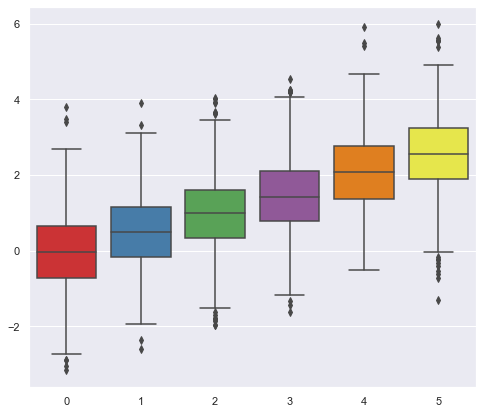

In [20]:
data = sps.norm.rvs(size=(1000, 6)) + np.arange(6) / 2

plt.figure(figsize=(8, 7))
sns.boxplot(data=data, palette='Set1')

Text(0.5, 1.0, '3')

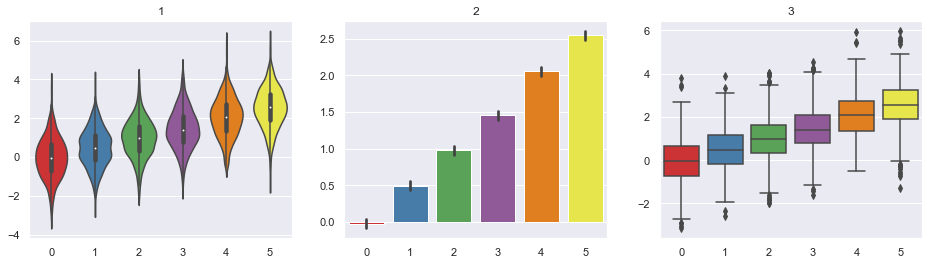

In [30]:
plt.figure(figsize=(16, 4)) 
plt.subplot(131)
sns.violinplot(data=data, palette='Set1')
plt.title('1')
plt.subplot(132)
sns.barplot(data=data, palette='Set1')
plt.title('2')
plt.subplot(133)
sns.boxplot(data=data, palette='Set1')
plt.title('3')


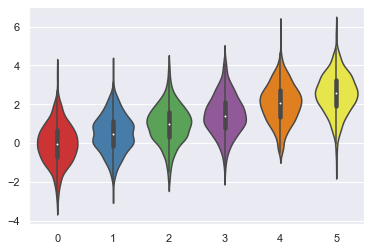

In [22]:
sns.violinplot(data=data, palette='Set1');

- მაგალითისთვის განვიხილოთ `tips` მონაცემები, რომელზეც `seaborn`-ს გააჩნია პირდაპირი წვდომა

- თავდაპირველად, მონაცემები შეადგინა ოფიციანტმა, რომელმაც ჩამოწერდა ყველა ის რჩევა, რომელიც მან მიიღო რესტორანში მუშაობისას  რამდენიმე თვის განმავლობაში. ცვლადიების სახელებია:
  - `total_bill` - ანგარიშის მთლიანი თანხა;
  - `tip` - წვერი თანხა;
  - `sex` - კლიენტის სქესი;
  - `smoker` - კლიენტი მწეველია თუ არა;
  - `day` - კვირის დღე (ოფიციანტი მუშაობდა ყოველ დღე);
  - `time` - დღის მონაკვეთი;
  - `size` - კლიენტის კომპანიაში ადამიანთა რაოდენობა

In [27]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- `Box Plot`-ის გამოყენებით ჩვენ შეგვიძლია ვიმისჯელოთ თუ რა დამოკიდებულებაა ანგარიშის მთლიანი თანხასა და კვირის დღეს შორის.

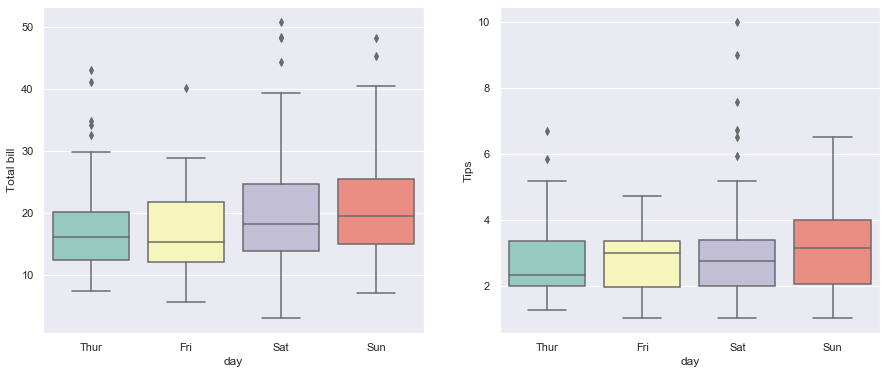

In [28]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.boxplot(x='day', y='total_bill', data=tips, palette='Set3')
plt.ylabel('Total bill')

plt.subplot(122)
sns.boxplot(x='day', y='tip', data=tips, palette='Set3')
plt.ylabel('Tips');

- მოდით განვიხილოთ იგივე დამოკიდებულება მწეველ და არამწეველ ჯგუფების მიმართ, რომელსაც ჩვენ გადავცემთ `hue` არგუმენტით.

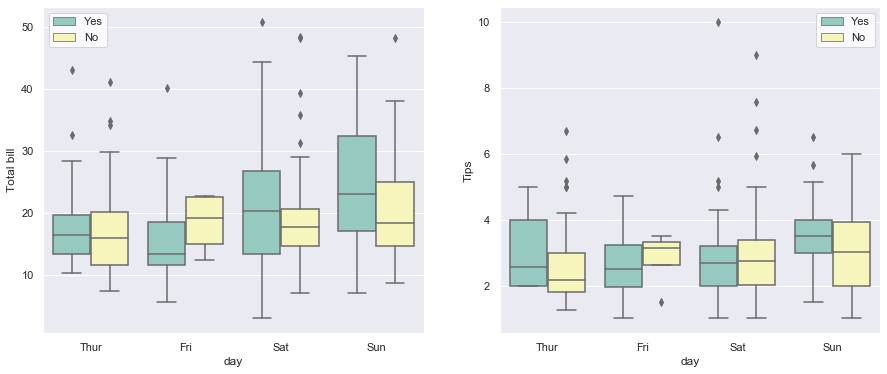

In [29]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
ax = sns.boxplot(x='day', y='total_bill', hue='smoker', 
                 data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Total bill')

plt.subplot(122)
ax = sns.boxplot(x='day', y='tip', hue='smoker', 
            data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Tips');

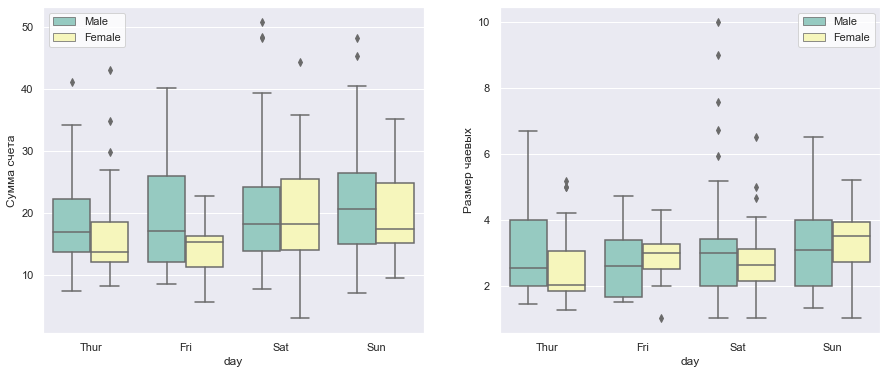

In [30]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
ax = sns.boxplot(x='day', y='total_bill', hue='sex', 
                 data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Сумма счета')

plt.subplot(122)
ax = sns.boxplot(x='day', y='tip', hue='sex', 
            data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Размер чаевых');

- მოდით შევადაროთ გრაფიკები. რომელი გამოიყურება უკეთ?

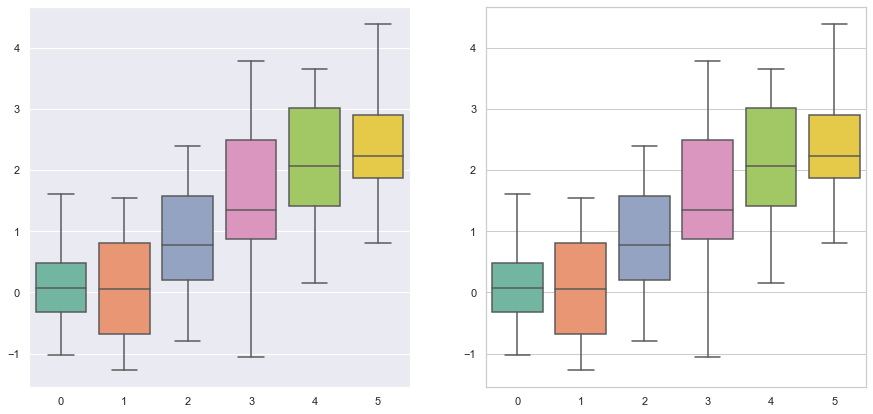

In [31]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2
plt.figure(figsize=(15, 7))

with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
    plt.subplot(121)
    sns.boxplot(data=data, palette='Set2')
    
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    plt.subplot(122)
    sns.boxplot(data=data, palette='Set2');

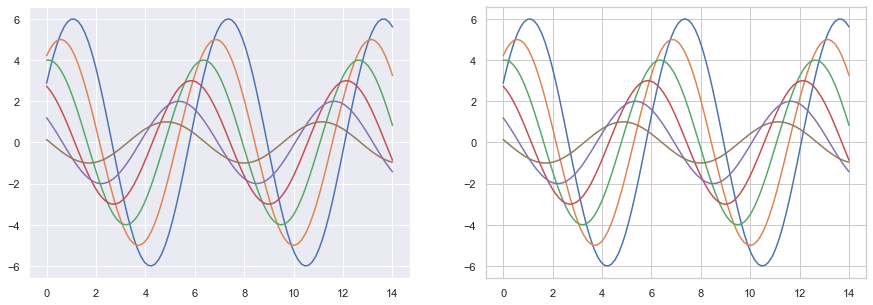

In [32]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2
plt.figure(figsize=(15, 5))

with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
    plt.subplot(121)
    sinplot()
    
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    plt.subplot(122)
    sinplot()

- `darkgrid`-ის გამოყენება მიზანშეწონილია **მსუბუქი** გრაფიკების (წერტილების, ხაზების) შესაქმნელად, რადგან ნაცრისფერ ფონზე თეთრი ბადე ხელს უწყობს ბადის მონაცემთა ხაზთან კონფლიქტის თავიდან აცილებას.


- `white`-ი (ან `whitegrid`-ი) უფრო შესაფერისია **მძიმე ელემენტების** მქონე გრაფიკებისთვის, მაგალითად დაშტრიხული არეების გამოსაკვეთად.

<h3 align="center">4. Violin plot</h3>

- `Violin plot` წარმოადგენს `boxplot` და `KDE`-ს კომბინაციას.


- **ღრუბლის** შიგნით მოთავსებულია ჩვეულებრივი `boxplot`-ი, მხოლოდ შეკუმშული ფორმით. ღრუბლის ფორმა შეესაბამება `KDE`-ს.


- `sns.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)`
  - `x`, `y`, `hue` - ერთგანზომილებიანი მონაცემები ან ცვლადების სახელები `data`-დან.
  - `data` - მონაცემები;
  - `bw` - ბირთვის სიგანე;
  - `gridsize` - ბადის ზომა KDE-ს დასახატავად;
  - `orient`: `"v"` | `"h"` - ორიენტაცია, ვერტიკალური თუ ჰორიზონტალური;
  - `color` и `palette` - ფერი და პალიტრა.

- ქვევით მოყვანილია `Violin plot`-ის მაგალითი:

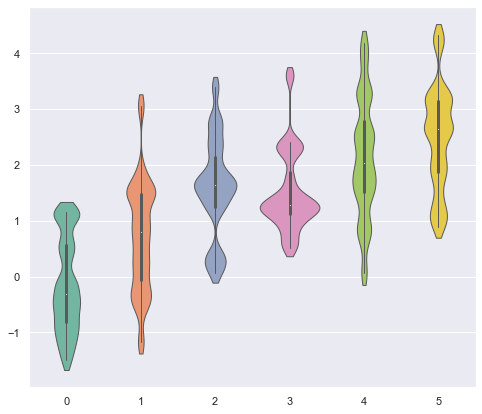

In [33]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2

plt.figure(figsize=(8, 7))
sns.violinplot(data=data, palette='Set2', bw=.2, cut=1, linewidth=1);

- განვიხილოთ **წვერის** მაგალითი: ორი `boxplot`-ის ნაცვლად ჩვენ შეგიძლია ავაგოთ ერთი `Violin plot`-ი.

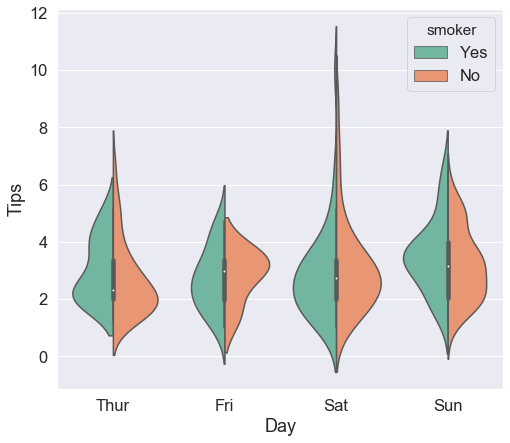

In [34]:
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(8, 7))
    sns.violinplot(x="day", y="tip", hue="smoker",
                   data=tips, palette="Set2", split=True);
    plt.ylabel('Tips');
    plt.xlabel('Day');

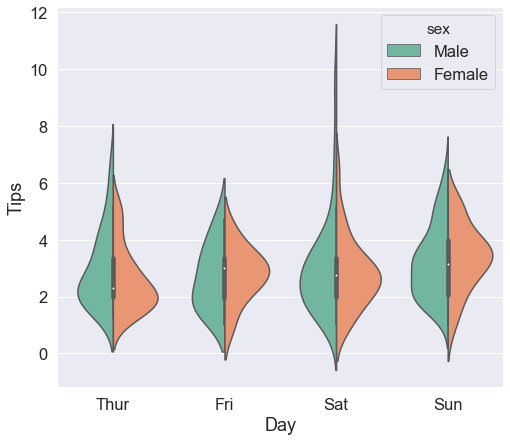

In [35]:
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(8, 7))
    sns.violinplot(x="day", y="tip", hue="sex",
                   data=tips, palette="Set2", split=True);
    plt.ylabel('Tips');
    plt.xlabel('Day');

<h3 align="center">5. PairGrid</h3>


- `PairGrid` წარმოადგენს გრაფიკების ბადეს მონაცემებში წყვილური ურთიერთობების ვიზუალიზაციისთვის.

- `class sns.PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, diag_sharey=True, size=2.5, aspect=1, despine=True, dropna=True)`
   - `data` - მონაცემები;
   - `hue` - კატეგორიები, რომლებიც გაფერადებული იქნება სხვადასხვა ფერებით;
   - `palette` - პალიტრა (შეიძლება მოცემული იყოს ფერების ლექსიკონი სახით);
   - `height` - თითოეული სახის სიმაღლე (ინჩში).


- ეს მეთოდი აბრუნებს ობიექტს, რომლისთვისაც შესაძლებელია შემდეგი ფუნქციები (ამ ფუნქციებში უნდა გადავცეთ `func` ფუნქცია, რომლის დახმარებითაც შედგენილი იქნება გრაფიკი, ასევე ამ ფუნქციის პარამეტრები):
  - `map(func, **kwargs)` - ყოველი უჯრისთვის გამოყენებულ იქნას `func` ფუნქცია;
  - `map_diag(func, **kwargs)` - ყოველი უჯრისთვის **დიაგონალზე** გამოყენებულ იქნას `func` ფუნქცია;
  - `map_offdiag(func, **kwargs)` - ყოველი უჯრისთვის **დიაგონალის გარეთ** გამოყენებულ იქნას `func` ფუნქცია;
  - `map_lower(func, **kwargs)` - ყოველი უჯრისთვის **დიაგონალის ქვევით** გამოყენებულ იქნას `func` ფუნქცია;
  - `map_upper(func, **kwargs)` - ყოველი უჯრისთვის **დიაგონალის ზევით** გამოყენებულ იქნას `func` ფუნქცია;

.
- მაგალითად, ჩვენ შეგვიძლია ფიშერის მონაცემების ვიზუალიზაცია:
  - **დიაგონალზე** ნაჩვენებია ბირთვული სიმკვრივის ერთგანზომილებიან შეფასებები;
  - **დიაგონალის ქვევით** - ორგანზომილებიანი;
  - **დიაგონალზე ზევით** ჩვენ გამოვსახავთ თვითონ წერტილებს.

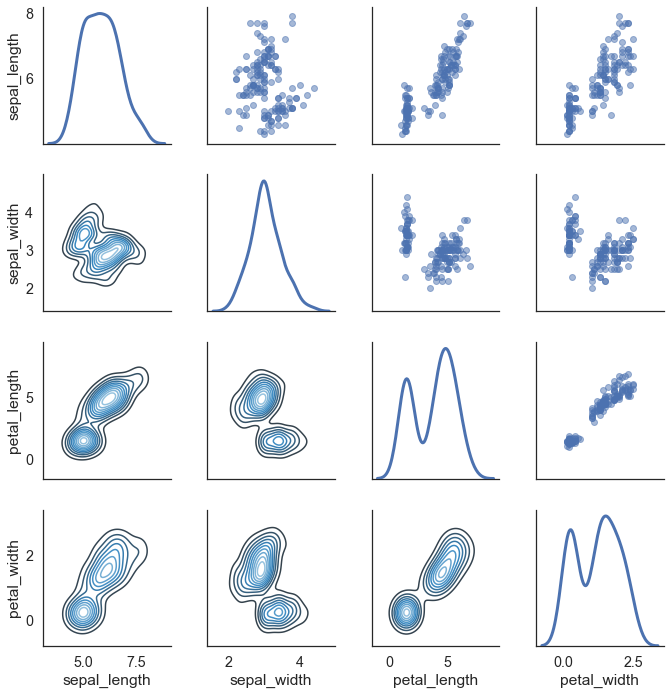

In [36]:
sns.set(style='white', font_scale=1.3)

df = sns.load_dataset('iris')

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter, alpha=0.5)
g.map_diag(sns.kdeplot, lw=3);

- ჩვენ შეგვიძლია შევცვალოთ `hue`- პარამეტრის კალსი.

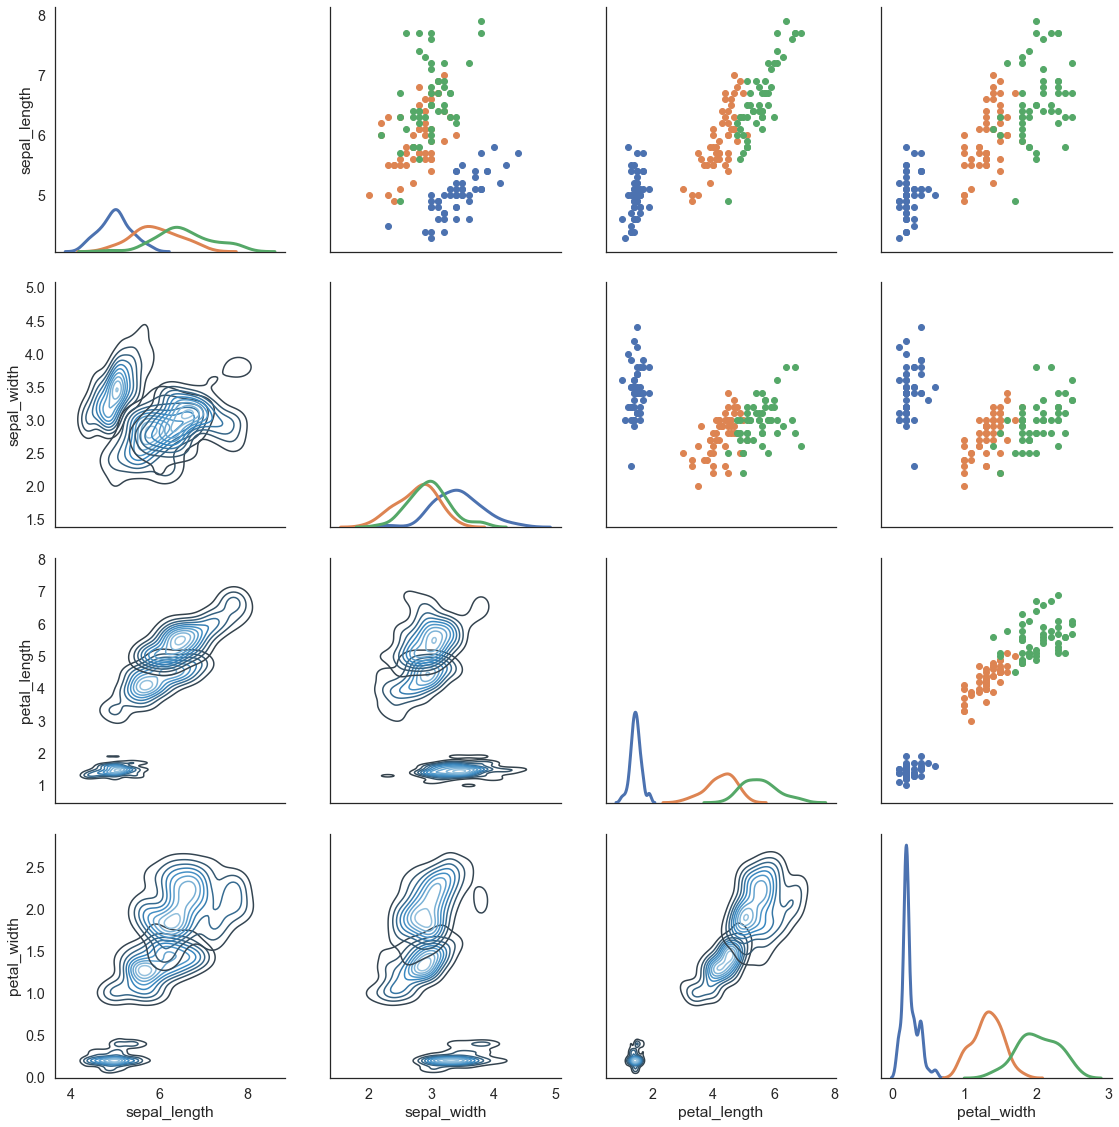

In [37]:
g = sns.PairGrid(df, hue='species', height=4)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

<h3 align="center">6. Heatmap</h3>

- `Heatmap` წარმოადგენს ორგანზომილებიან ცხრილის სითბურ რუქის სახით ვიზუალიზაციას.


- `sns.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)`
  - `data` - 2D-მონაცემები;
  - `vmin` და `vmax` - ფერების მინიმალური და მაქსიმალური მნიშვნელობები;
  - `cmap` - ფერის სქემა;
  - `robust` - თუ True და `vmin` ან `vmax` არ არის მითითებული, `colormap`–ის დიაპაზონი გამოითვლება ძლიერი რიცხვებით, ექსტრემალური მნიშვნელობების ნაცვლად.
  - `annot` - რომელ უჯრედებში უნდა მოხდეს მონაცემების ჩაწერა;
  - `fmt` - მონაცემთა ჩაწერის ფორმქტი;
  - `linewidths` - ხაზების სიგანე უჯრედებს შორის;
  - `linecolor` - ხაზების ფერი უჯრედებს შორის;
  - `cbar` - გამოაჩინოს თუ არა `colorbar`-ი.

- მაგალითისთვის განვიხილოთ ყოველთვიური მონაცემები **თვითმფრინავების მგზავრების რაოდენობი** 1949 წლიდან 1960 წლამდე:

In [38]:
flights_long = sns.load_dataset('flights')
flights_long.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [39]:
flights_long.shape

(144, 3)

- შევქმნათ შეჯერებული ცხრილი (`pivot_table`) სადაც სვეტის მიხედვით იქნება წელიწადი ხოლო სტრიქონის მიხედვით თვე:

In [40]:
flights = flights_long.pivot_table(index='month', 
                                   columns='year', 
                                   values='passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


- ჩვენ შეგვიძლია ამ ცხრილის ვიზუალიზაცია `heatmap` -ის გამოყენებით:

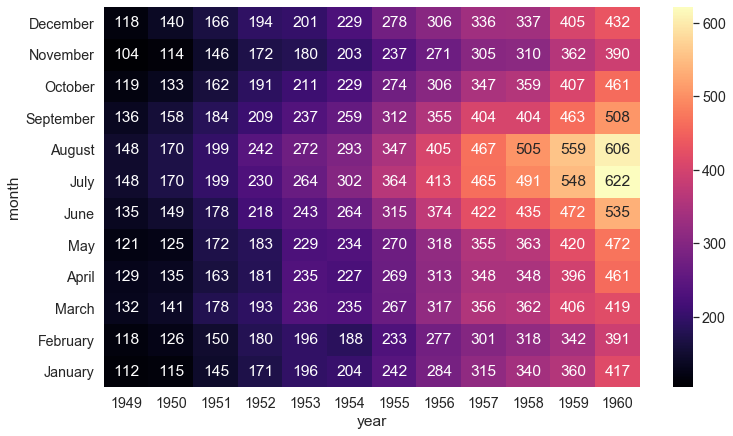

In [41]:
sns.set(font_scale=1.3)
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(flights, annot=True, fmt='d', ax=ax, cmap="magma")
plt.ylim((0, 12));

**ყურადღება:** `sns.heatmap`-ს არ შეუძლია **NaN** ის დამუშავება. თუ თქვენ მას გადასცემთ მონაცემებს სადაც არის გამოტოვებები, ის ამოგიგდებთ `TypeError` ფუნქციას.

In [42]:
sns.heatmap(np.array([1., np.nan], [3., 4.]))

TypeError: data type not understood

<h3 align="center">7. Clustermap</h3>

- `Clustermap`-ი წარმოადგენს `heatmap`-ის ანალოგს, რომელიც ავტომატურად აჯგუფებს ცხრილის მსგავს სტრიქონებს და/ან სვეტებს.


- ხანდახან არის საჭირო მონაცემებში სტრუქტურის პოვნა, მაგალითად მონაცემების ჯგუფებად დაყოფა.


- `seaborn.clustermap(data, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, figsize=(10, 10), cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, dendrogram_ratio=0.2, colors_ratio=0.03, cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None, **kwargs)`

- ამ ფუნქციას გააჩნია ძალიან ბევრი ტექნიკური პარამეტრი, ამიტომ განვიხილოთ მხოლოდ რამოდენიმე რომელიც არ გააჩნია `heatmap`:
   - `data` - 2D-მონაცემები;
   - `row_cluster`, `col_cluster` -  დააჯგუფოს თუ არა შესაბამისად სტრიქონები ან სვეტები;
   - `row_colors`, `col_colors` - ინდივიდუალური სტრიქონების და სვეტების ფერის ეტიკეტები (საშუალებას გაძლევთ აკონტროლოთ მათი რიგი);
   - `method` - დ|აჯგუფების მეთდი (იხ. დოკუმენტაცია [იერარქიული / აგლომერაციული კლასტერიზაციის](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) შესახებ);
   - `mask` - იძლევა საშუალებას მიუთოთ თუ ცხრილის რომელი მნიშვნელობები არ იყოს ნაჩვენები;
   - `z_score` - მოახდინოს თუ არა სტრიქონების და სვეტების სტანდარტიზაცია (`(x - mean(x)) / std(x)`);
   - `standard_scale`- გადაიყვანოს თუ არა ყველა სტრიქონები და სვეტები [0, 1] დიაპაზონში (`(x - min(x)) / (max(x) - min(x))`);

- მაგალითისთვის განვიხილოთ `seaborn`-ში ჩასმული `brain_networks` მონაცემები, რომელიც ბიბლიოთეკის ავტორის მიერ არის მოცემული.


- მონაცემების მაგალითში ტვინის მსგავსი რეგიონების ჯგუფები გაერთიანებულია მათი საქმიანობის პროფილების კორელაციის შესაბამისად

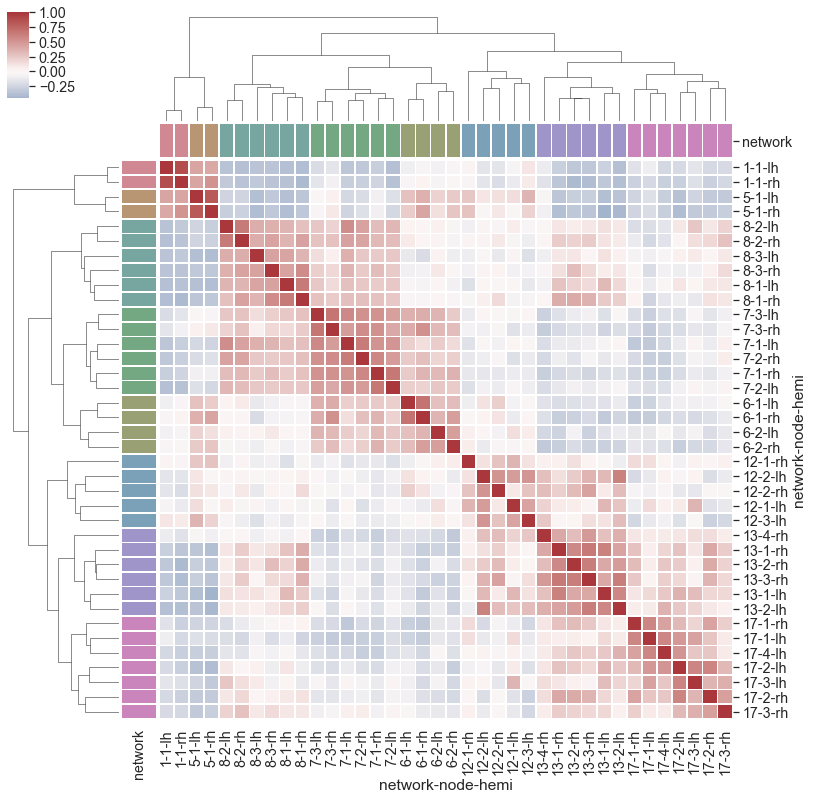

In [43]:
data = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# ავირჩიოთ ტვინის რეგიონების ქვესიმრავლე
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (data.columns.get_level_values("network")
                            .astype(int)
                            .isin(used_networks))
data = data.loc[:, used_columns]

# შევქმნათ კატეგორიული პალიტრა
network_pal = sns.husl_palette(len(used_networks), s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# გავაფერადოთ სტრიქონები და სვეტები არჩეული რეგიონის შესაბამისად
networks = data.columns.get_level_values("network")
network_colors = pd.Series(networks, index=data.columns).map(network_lut)


# დავხატოთ ტვინის რეგიონების საქმიანობის ნიმუშების კორელაციის გრაფიკი და დარწმუნდით,
# რომ ერთი განყოფილების სექციები ერთ ჯგუფში შედის იერარქიული კლასტერების შემდეგ
sns.clustermap(data.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13));

<h3 align="center">8. Jointplot</h3>


- `Jointplot` წარმოადგენს ორი ცვლადის გრაფიკს, რომელიც აკავშირებს 1D და 2D განზომილებიან გრაფიკების ფუნქციებს.

- `sns.jointplot(x, y, data=None, kind='scatter', stat_func=<function pearsonr>, color=None, size=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)`
  - `x`, `y` - მონაცემები ან ცვლადები `data`-დან;
  - `data` - მონაცემები;
  - `kind` : { `"scatter"` | `"reg"` | `"resid"` | `"kde"` | `"hex"` } - გრაფიკის ტიპი (წერტილი, რეგრესია, ნაშთი, ბირთვული სიმკვრივის შეფასება, 16-ნიშნა პოზიციური სისიტემა);
  - `stat_func` - სტატისტიკური ფუნქციის კატეგორია, რომელიც აბრუნებს სტატისტიკას და  $p$-მნიშვნელობებს;
  - `color` - ფერი;
  - `height` - ფიგურის სიმაღლე;
  - `dropna` - ვარიელი მონაცემების ამოღება;
  - `xlim`, `ylim` - შეზღუდვები ღერძების მიხედვით.

- მაგალითისთვის, დავაგენერიროთ ნორმალურად განაწილებული ორგანზომილებიანი ნიმუში:

In [44]:
x, y = sps.multivariate_normal(cov=[[2, 1], [1, 2]]).rvs(size=200).T

- მოვახდინოთ ორგანზომილებიანი სიმკვრივის შეფასებასის ვიზუალიზაცია

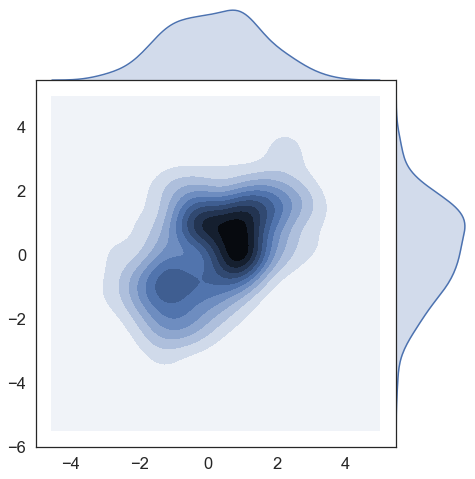

In [45]:
with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("white"):
    sns.jointplot(x, y, kind='kde', height=7, space=0);

- თუ ჩვენ არ მივუთითებთ ვიზუალიზაციის ტიპს, მაშინ დახატული იქნება წერტილები და ჰისტოგრამები.

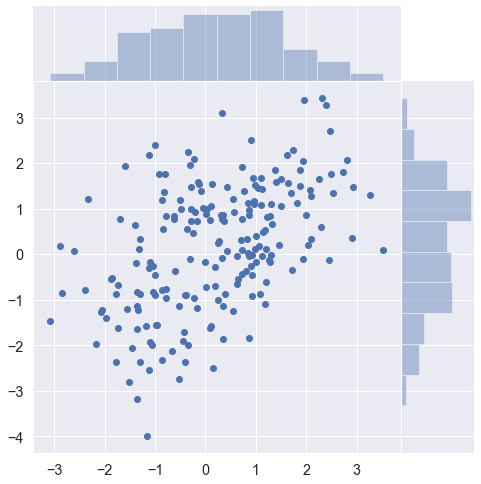

In [46]:
sns.jointplot(x, y, height=7, space=0);

- აღსანიშნავია, რომ ჩვენ შეგვიძლია `sns.jointplot`-ს ხელით კონფიგურირება!


- გრაფიკის სამივე ნაწილი, რასაც `JointGrid` ობიქტი აბრუნებს, ექვემდებარება კონფიგურირებას:
- `ax_marg_x` - ზედა გრაფიკი;
- `ax_marg_y` - მარჯვენა გრაფიკი;
- `ax_joint` - ცენტრალური გრაფიკი.

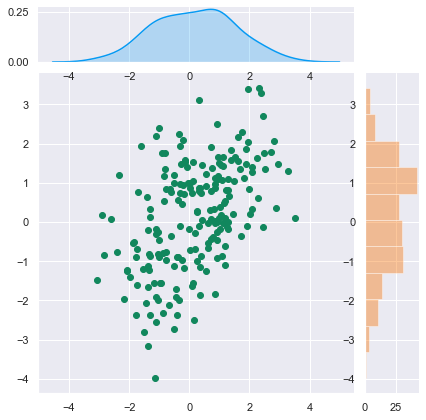

In [47]:
with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
    graph = sns.jointplot(x, y, color="xkcd:dark sea green")
    graph.ax_marg_x.clear()
    sns.kdeplot(x, shade=True, color="xkcd:azure", ax=graph.ax_marg_x)
    graph.ax_marg_y.clear()
    sns.distplot(y, vertical=True, kde=False, 
                 color="xkcd:orange", ax=graph.ax_marg_y);

<h1 align="center">ლექციის დასასრული</h1>